In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mass import MassSpectrum
from mass import VanKrevelen

D:\Work\prog\github\Новая папка (3)\masslib\mass.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes as inset_axes_func


#### Loading and assign brutto formules by this lib

In [2]:
mapper = {"m/z": "mass", "I": "I"}
fa = MassSpectrum().load("data/fa.csv",
                         mapper=mapper,
                         sep=',',
                         ignore_columns=["Name", "I %", "Res.", "S/N"])
fa = fa.assign_dummy(elems='CHO').drop_unassigned()
vk = VanKrevelen(fa.table)

#### Load assigned mass-list calculated in transhumus

In [3]:
mapper = {"mw": "mass", "relativeAbundance": "I"}
fa_tr = MassSpectrum().load("data/fa_th.csv",
                            mapper = mapper,
                            sep=',',
                            ignore_columns=["peakNo", "errorPPM", "DBE", "class", "z"]
                           )
vk_tr = VanKrevelen(fa_tr.table)

#### Search for common formulas in two methods

In [4]:
common = fa & fa_tr
vk_com = VanKrevelen(common.table)

#### Search for the symmetric difference between the two methods

In [5]:
dif = fa ^ fa_tr
vk_dif = VanKrevelen(dif.table)

#### Plot Van Krevelen diagrams

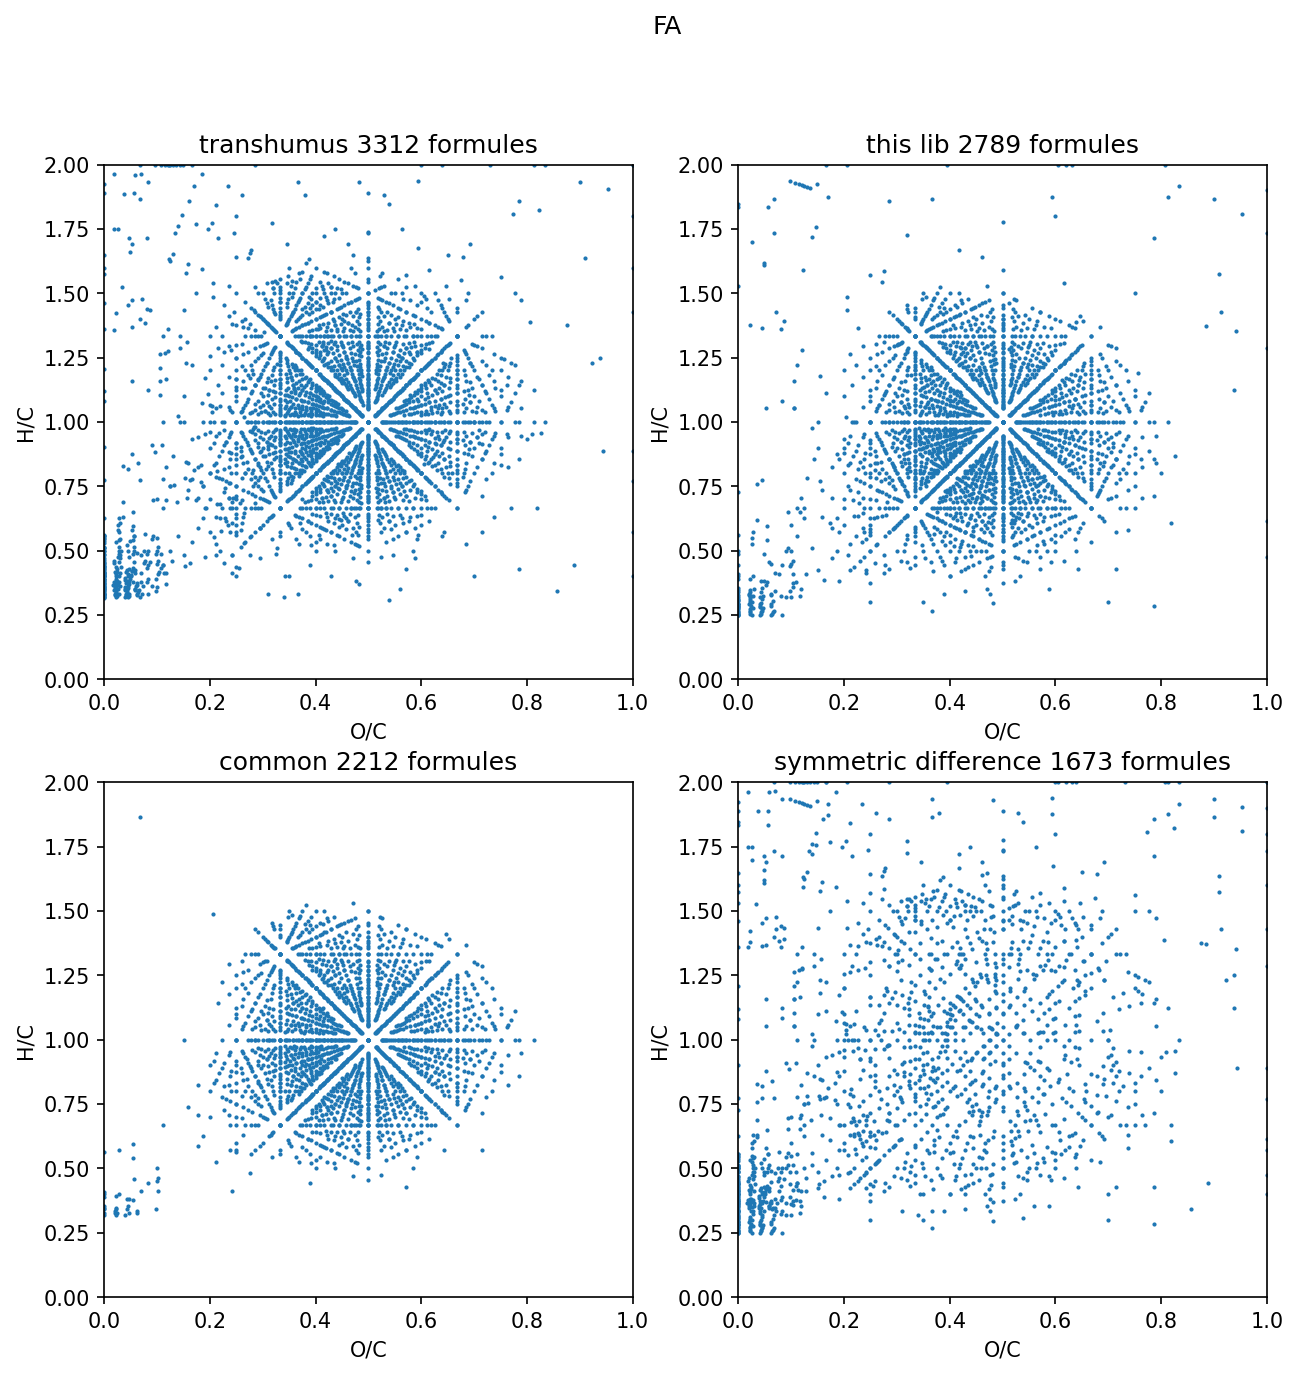

In [6]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10), dpi = 150)
fig.suptitle('FA')

tables = [vk_tr.table, vk.table, vk_com.table, vk_dif.table]
names = ['transhumus', 'this lib', 'common', 'symmetric difference']

for ite in range(4):
    i = ite//2
    j = ite%2
    ax[i][j].scatter(tables[ite]["O/C"], tables[ite]["H/C"], s = 1)
    ax[i][j].set_xlim(0,1)
    ax[i][j].set_ylim(0,2)
    ax[i][j].set_xlabel('O/C')
    ax[i][j].set_ylabel('H/C')
    ax[i][j].set_ylabel('H/C')
    ax[i][j].set_title(f'{names[ite]} {tables[ite].shape[0]} formules')